# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [60]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
import pandas as pd

In [37]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [38]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [39]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Show a lineplot of fraction of total variance vs. number of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

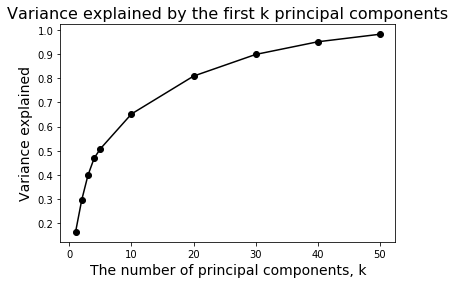

In [40]:
#def P1():

### STUDENT START ###
# Normalization ?

# ########################
# # 1. Inspect correlations among features
# # Convert to dataframe first
# import pandas as pd
# TrainData = pd.DataFrame(train_data)

# # Plot
# import seaborn as sns
# # # Set up the matplotlib figure
# # f, ax = plt.subplots(figsize=(30,30))
# # # Title
# # plt.title('Pearson Correlation of Mushroom Features')
# # # Draw the heatmap using seaborn
# # sns.heatmap(TrainData.astype(float).corr(),
# #             linewidths=0.1,
# #             vmax=1.0,
# #             square=True,
# #             annot=False,
# #             cmap="RdBu_r");

########################
# 2. PCA
'''Do a principal components analysis on the data.'''

# K values
K = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
# PCA objects
PCAs = []
# Variance explained
VarExp = []

# For each value of K
for k in K: 
    # Reduce dimensionality from 126 to 2 
    pca = PCA(n_components=k)
    # Construct PCA, apply reduction
    PCAs.append(pca.fit_transform(train_data))
    # Variance explained
    VarExp.append(pca.explained_variance_ratio_)

    
########################
# 3. Plot fraction of variance explained by principal components
'''Show what fraction of the total variance in the training data
is explained by the first k principal components,
for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].'''

# Cumulative variance
pca_cumvar = np.cumsum(pca.explained_variance_ratio_)
# Curate data
# Index only desired k
index = [0,1,2,3,4,9,19,29,39,49]
# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(K, pca_cumvar[index],
       alpha=1,marker="o",
       color="k")
# Title
plt.title('Variance explained by the first k principal components', fontsize=16)
# Axes
plt.xlabel('The number of principal components, k', fontsize=14)
plt.ylabel('Variance explained', fontsize=14)
# Show
plt.show()




# # Plot the Information Gain graph
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(pca.explained_variance_ratio_[index],
#        alpha=1,
#        color="k")
# fig.suptitle('Variance explained by k principal components', fontsize=18)
# plt.xlabel('Number of principal components (k)', fontsize=14)
# plt.ylabel('Variance explained', fontsize=14)
# plt.grid(True)
# ax.set_xlim([0,55])
# ax.set_ylim([0.0,1.0])
### STUDENT END ###

#P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

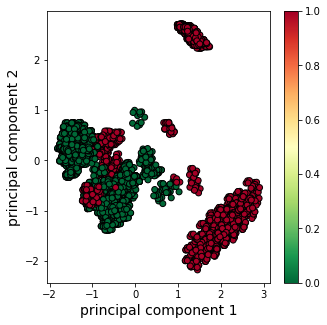

In [41]:
#def P2():

### STUDENT START ###

#####################
# 1. PCA
# Reduce dimensionality from 126 to 2 
pca2D = PCA(n_components=2)
# Construct PCA, apply reduction
pca2D = pca2D.fit_transform(train_data)
    
#####################
# 2. Plot   
# Let's see how it looks like in 2D - could do a 3D plot as well
plt.figure(figsize = (5,5))
plt.scatter(pca2D[:, 0], pca2D[:, 1],
           c=train_labels,
           edgecolor='k',
           alpha=1,
           cmap='RdYlGn_r')
# Axis labels
plt.xlabel('principal component 1', fontsize=14)
plt.ylabel('principal component 2', fontsize=14)
# Show legend
plt.colorbar()
plt.show();

### STUDENT END ###

#P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

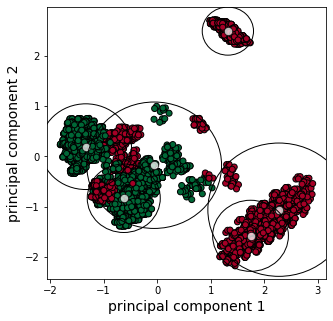

In [42]:
#def P3():

### STUDENT START ###


#####################
# 1. PCA
# PCA
pca = PCA(n_components=2)
# Reduce dimensionality
reduced_train_data = pca.fit_transform(train_data)

#####################
# 1. K-means
'''Fit a k-means cluster model with 6 clusters over the 2d projected data.'''
# Kmeans object
KM = KMeans(n_clusters=6)
# Compute k-means clustering.
KM.fit(reduced_train_data)
# Compute centroid locations
centroids = KM.cluster_centers_

#####################
# 2. Plot
'''Show the positive (poisonous) examples in red and the negative (non-poisonous)
examples in green. For each cluster, mark the centroid and
plot a circle that goes through the cluster's example that is most distant 
from the centroid.'''

# Plot PCA
# Let's see how it looks like in 2D - could do a 3D plot as well
plt.figure(figsize = (5,5))
plt.scatter(reduced_train_data[:, 0], reduced_train_data[:, 1],
           c=train_labels,
           edgecolor='k',
           alpha=1,
           cmap='RdYlGn_r')
# Axis labels
plt.xlabel('principal component 1', fontsize=14)
plt.ylabel('principal component 2', fontsize=14)
# Show legend
# plt.colorbar()

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
           s=70,
           c='white',
           edgecolor='k',
           alpha=0.75)

# For each index and centroid location
for ind, i in enumerate(centroids):
    # Determine class index
    class_inds = np.where(KM.labels_==ind)[0]
    # Reshape each centroid to a 2D array
    I = np.reshape(i, (1,-1))
    # Determine maximum distance from centroid
    max_dist = np.max(metrics.pairwise_distances(I,
                                                 reduced_train_data[class_inds]))
        
    # Plot ellipses
    plt.gca().add_artist(plt.Circle(i, max_dist, fill=False))
# Plot 
plt.show()


# # Plot radii
# # Initialize dictionaries
# clusters_centroids=dict()
# clusters_radii= dict()

# # For each cluster
# for cluster in list(centroids):
#     #
#     clusters_centroids[cluster]=list(zip(K_means.cluster_centers_[:, 0],
#                                          K_means.cluster_centers_[:,1]))[cluster]
#     #
#     clusters_radii[cluster] = max([np.linalg.norm(np.subtract(i, clusters_centroids[cluster]))\
#                                    for i in zip(pca2D[y_kmeans == cluster, 0],
#                                                 pca2D[y_kmeans == cluster, 1])])


plt.show();
### STUDENT END ###

#P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show plots of the estimated density contours.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Log scale: values of z <= 0 have been masked
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Log scale: values of z <= 0 have been masked
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Log scale: values of z <= 0 have been masked
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Log scale: values of z <= 0 have been masked
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Log scale: values of z <= 0 have been masked
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Log scale: values of z <= 0 have been masked
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Log scale: values of z <= 0 have been masked
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Log scale: values of z <= 0 have been masked
//anacon

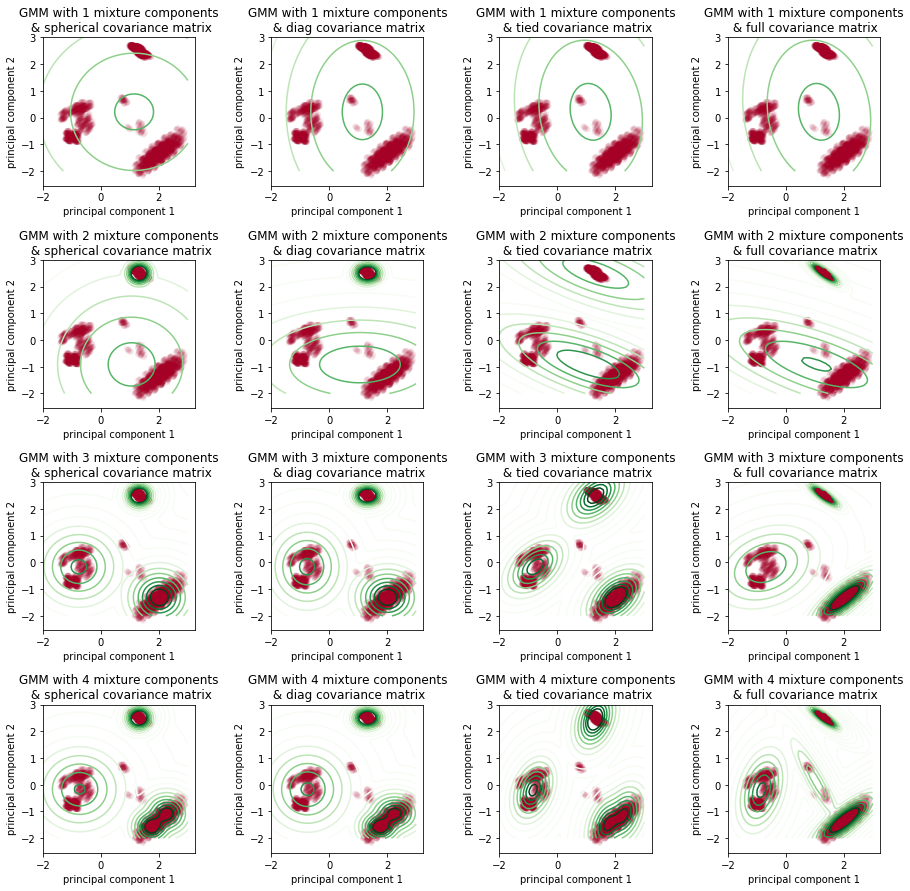

In [43]:
#def P4():

### STUDENT START ###

####################
# 1. PCA with only positive samples
# PCA
pca = PCA(n_components=2)
# Reduce dimensionality
TrainData = pca.fit_transform(train_data)
# Positive samples
Poisonous_train_data = TrainData[train_labels == 1]

####################
# 2. Build and plot Gaussian mixture models
# Figure size
plt.figure(figsize=(15, 15))
# Spaces between
plt.subplots_adjust(wspace=0.5, 
                    hspace=0.5)
# Number of Mixture components
components = [1,2,3,4]
# Covariance types
covariance = ["spherical","diag","tied","full"]

# For each component
for i in range(4):
    # And each covariance type
    for j in range(4):

        # Build the plots
        cnt = 4*i + j + 1
        ax = plt.subplot(4,4, cnt)

        #Fit a Gaussian Mixture Model with i components and j covariance
        GMM = GaussianMixture(n_components = components[i],
                              covariance_type = covariance[j],
                              random_state=12345)
        
        # Estimate model parameters with the EM algorithm.
        GMM.fit(Poisonous_train_data)

        # Plot predicted scores of the models as contour plots
        # Grid
        X, Y = np.meshgrid(np.linspace(-2, 3),
                           np.linspace(-2, 3))
        # Transpose arrays
        XX = np.array([X.ravel(),
               Y.ravel()]).T

        # Compute the weighted log probabilities for each sample.
        Z = -GMM.score_samples(XX)
        # Reshape Z
        Z = Z.reshape(X.shape)

        # Contours
        Contours = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0,
                                              vmax=10.0),
                        levels=np.logspace(0, 2, 15),
                             cmap='Greens_r',alpha=1)
#         # Colorbar
#         Colorbar = plt.colorbar(Contours,
#                           shrink=0.8,
#                           extend='both')
        # PCA Scatter
        ax.scatter(Poisonous_train_data[:, 0],
                   Poisonous_train_data[:, 1],
                   c=train_labels[train_labels==1],
                   edgecolor='none',
                   alpha=0.09,
                   cmap='RdYlGn')
        # Title
        plt.title('GMM with {0} mixture components\n\
 & {1} covariance matrix'\
                  .format(components[i],
                          covariance[j]))
        # Axis labels
        plt.xlabel('principal component 1')
        plt.ylabel('principal component 2')

#P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy or you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [44]:
#def P5():

### STUDENT START ###
####################
# 1. PCAs with only positive or only negative samples
# PCA
pca = PCA(n_components=2)
# Reduce dimensionality for poisonous samples
train_data_2D = pca.fit_transform(train_data)
# Reduce dimensionality for all data
test_data_2D = pca.transform(test_data)

####################
# 2. Subset data
# Positive samples
PositiveTrainData = train_data_2D[train_labels == 1]
# Negative samples
NegativeTrainData = train_data_2D[train_labels == 0]

####################
# 3. Gaussian mixture models for only positive or only negative samples 
# Fit a Gaussian Mixture Model with two components for the poisonous samples
GMM_P = GaussianMixture(n_components=4,
                      covariance_type='full',
                      random_state=12345)

# Fit a Gaussian Mixture Model with two components for the Nonpoisonous samples
GMM_NP = GaussianMixture(n_components=4,
                      covariance_type='full',
                      random_state=12345)

# Estimate model parameters with the EM algorithm.
Fit_P = GMM_P.fit(PositiveTrainData)
# Estimate model parameters with the EM algorithm.
Fit_NP = GMM_NP.fit(NegativeTrainData)

####################
# 4. Determine probabilities assigned by each model 
# Compute the weighted log probabilities for each sample and convert log probability to probability
Probs_P = np.exp(Fit_P.score_samples(test_data_2D))
# Compute the weighted log probabilities for each sample and convert log probability to probability
Probs_NP = np.exp(Fit_NP.score_samples(test_data_2D))

####################
# 5. Predict test samples with the model that assigned the largest probability density
# Initiate list for prediction probabilities
PredictionProbs = []
# Initiate list for predicted labels
Labels = []

# For each probability assigned to each sample from each model
for p in range(Probs_P.shape[0]):
    # If the model built with only poisonous samples predicts a larger probability
    if Probs_P[p] > Probs_NP[p]:
        # Use it
        PredictionProbs.append(Probs_P[p])
        # Add a 1 to the list of lables
        Labels.append(1)
    # Otherwise
    else:
        # Use the prediction from the non-poisonous data set
        PredictionProbs.append(Probs_NP[p])
        # Add a 0 to the list of lables
        Labels.append(0)
        

####################
# 6. Compute accuracies
# Initialize count for correct predictions
CorrectPredictions = 0

# Determine accuaracies
# for each label in the test data
for l in range(test_labels.shape[0]):
    # If the predicted label equals the observed label
    if Labels[l] == test_labels[l]:
        # Then add 1 to the count
        CorrectPredictions += 1
    # Otherwise
    else:
        # Keep going
        continue
        
# Print accuracy
print("The accuracy of the predictions from both models is {0:.2f}%"\
      .format(CorrectPredictions/len(Labels)*100))


### STUDENT END ###

#P5()

The accuracy of the predictions from both models is 95.02%


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

$$( (3 \, mean \, vectors + 3 \, covariance \, matrices) * 2 \, gmm \, components ) * 2 \, classes = 24 \, parameters$$

In [123]:
#def P6():

### STUDENT START ###

####################
# 1. Define the hyperparamter space

# Number of principal components
PrincipalComponents = [1,2,3,4]
# Number of principal components
PCs = []
# Number of GMM components 
MixtureComponents = [1,2,3,4]
# Number of GMM components 
MCs = []
# Covariance type
CovarianceType = ['spherical', 'diag', 'tied', 'full']
# Covariance type
CTs = []
# Number of parameters 
Np = []
# Accuracies
Accuracies = []

####################
# 2. Iterate through hyperparameter space

# For each principal component, p
for p in range(len(PrincipalComponents)):
    # For each mixture component, m
    for m in range(len(MixtureComponents)):
        # For each covariance type, c
        for c in range(len(CovarianceType)):
            
            # Reduce dimensionality with PCA
            pca = PCA(n_components=PrincipalComponents[p])
            # Fit the model with X and apply the dimensionality reduction on X
            TrainData = (pca.fit_transform(train_data))
            # Reduce dimensionality for all test data
            TestData = (pca.transform(test_data))
            # Append PCs to list
            PCs.append(PrincipalComponents[p])
            
            # Fit GMM to poisonous data for each PC
            GMM_P = GaussianMixture(n_components=MixtureComponents[m],
                                 covariance_type=CovarianceType[c],
                                 random_state=12345)
            # Estimate model parameters with the EM algorithm for poisonous samples.
            GMM_P.fit(TrainData[train_labels==1])
            # Compute the weighted log probabilities for each sample and convert log probability to probability
            ProbDens_P = np.exp(GMM_P.score_samples(TestData))
            
            # Fit GMM to nonpoisonous datafor each PC
            GMM_NP = GaussianMixture(n_components=MixtureComponents[m],
                                 covariance_type=CovarianceType[c],
                                 random_state=12345)
            # Estimate model parameters with the EM algorithm.
            GMM_NP.fit(TrainData[train_labels==0])
            # Compute the weighted log probabilities for each sample and convert log probability to probability
            ProbDens_NP = np.exp(GMM_NP.score_samples(TestData))
            
            # Append Mixture components to list
            MCs.append(MixtureComponents[m])
            # Append covariance types to list
            CTs.append(CovarianceType[c])
            
            
            # Calculate the number of parameters
            Np.append(((PrincipalComponents[p]+PrincipalComponents[p])\
                                           *MixtureComponents[m])*2)
#####################
# 3. Predict test samples with the model that assigned the largest probability density
            # Initiate list for prediction probabilities
            PredictionProbs = []
            # Initiate list for predicted labels
            Labels = []

            # For each probability estimate, e, assigned to each sample from each model
            for e in range(len(test_data)):
                # If the model built with only poisonous samples predicts a larger probability
                if ProbDens_P[e] > ProbDens_NP[e]:
                    # Use it
                    PredictionProbs.append(ProbDens_P[e])
                    # Add a 1 to the list of lables
                    Labels.append(1)
                # Otherwise
                else:
                    # Use the prediction from the non-poisonous data set
                    PredictionProbs.append(ProbDens_NP[e])
                    # Add a 0 to the list of lables
                    Labels.append(0)

            # Calculate accuracies
            Accuracies.append(metrics.accuracy_score(test_labels, Labels))
#####################
# 4. Tabulate accuracies across the parameter space

# data
            df = {'PCs': PCs, 
                  'Mixture_components': MCs,
                  'Covariance_type': CTs,
                  'Number_of_parameters': Np,
                  'Accuracy': [round(d,2) for d in Accuracies]}
# Table
df = pd.DataFrame(data=df)

#####################
# 5. Define the best model
b = np.argmax(Accuracies)

# # The best model's hyperparameters
print("The model with {0} principal components,\
 {1} mixture components,\
 {2} covariance type,\
 and {3} total parameters,\
 had a accuracy of {4:.2f}"\
     .format(PCs[b],
            MCs[b],
            CTs[b],
            Np[b],
            np.amax(Accuracies)))

# Print data with < 50 parameters
df[df.Number_of_parameters < 50]
### STUDENT END ###

#P6()

The model with 4 principal components, 3 mixture components, tied covariance type, and 48 total parameters, had a accuracy of 0.97


,PCs,Mixture_components,Covariance_type,Number_of_parameters,Accuracy
0,1,1,spherical,4,0.84
1,1,1,diag,4,0.84
2,1,1,tied,4,0.84
3,1,1,full,4,0.84
4,1,2,spherical,8,0.90
5,1,2,diag,8,0.90
6,1,2,tied,8,0.88
7,1,2,full,8,0.90
8,1,3,spherical,12,0.91
9,1,3,diag,12,0.91
